<a href="https://colab.research.google.com/github/AKBER-HUSSAIN/ML_Lab_Practice/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES DATASET**

In [ ]:
import pandas as pd
df = pd.read_csv('/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print("Shape:", df.shape)
print("Types:", df.dtypes)

Shape: (768, 9)
Types: Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


**CONSTANT FEATURES**

In [ ]:
constant_features = [
    features for features in df.columns if df[features].std() == 0
]
print(f"Number of constant features: {len(constant_features)}")

Number of constant features: 0


**Quasi Constant Features**

In [ ]:
quasi_constant_features = []
for feature in df.columns:
    predominant = (df[feature].value_counts() / len(df)).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)

print(f"Number of Quasi Constant Features: {len(quasi_constant_features)}")

Number of Quasi Constant Features: 0


**Duplicated Features**

In [ ]:
duplicated_features = []

for i in range(len(df.columns)):
    col_1 = df.columns[i]
    for col_2 in df.columns[i + 1:]:
        if df[col_1].equals(df[col_2]):
            duplicated_features.append(col_2)
print(f"Number of duplicated features: {len(duplicated_features)}")
print("Duplicate features : ",duplicated_features)

Number of duplicated features: 0
Duplicate features :  []


<Axes: >

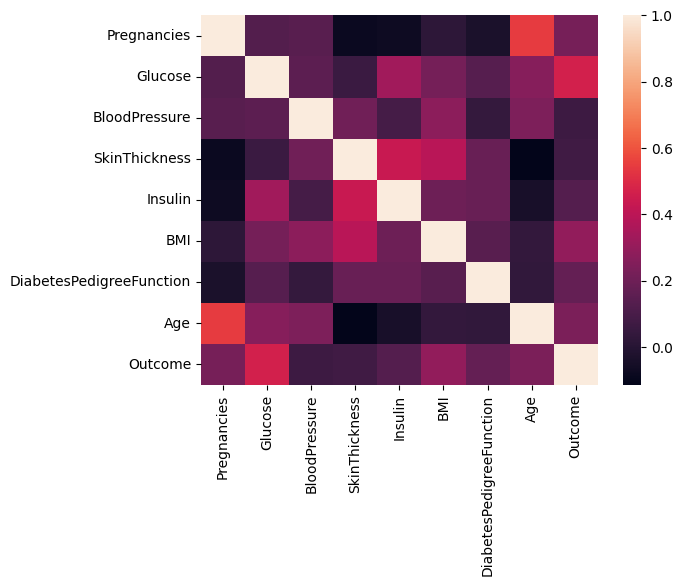

In [ ]:
import seaborn as sns
corrmat = df.corr()
sns.heatmap(corrmat)


🔸 Highly Correlated Features (> 0.9): []


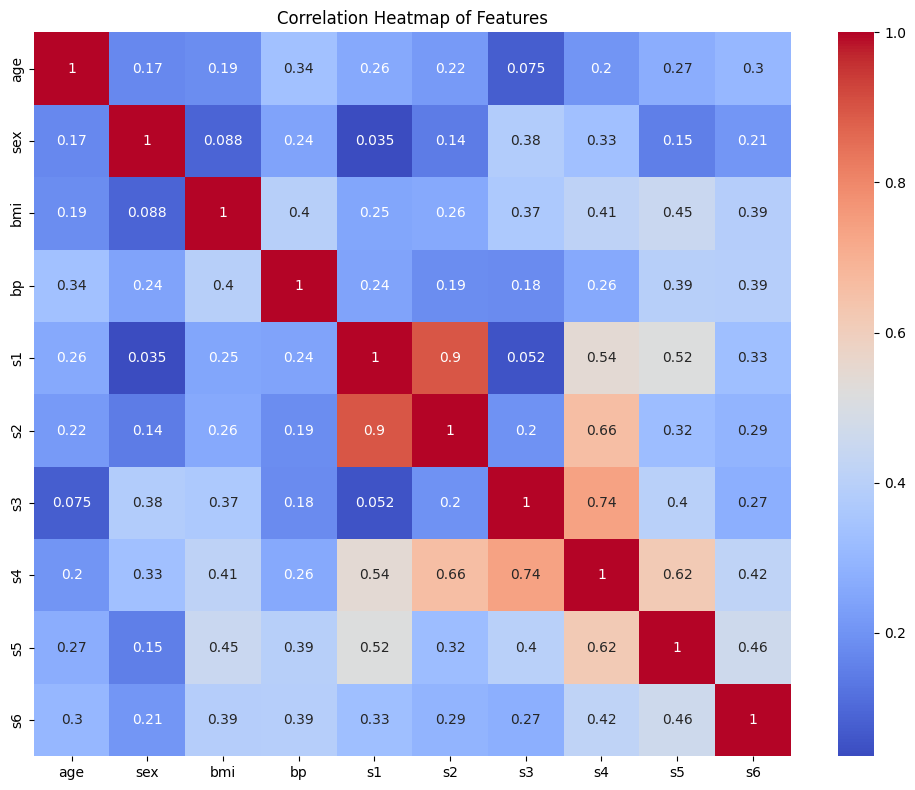

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

# Load diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# ----------------------------
# 4️⃣ Correlation-Based Filter
# ----------------------------
# Compute correlation matrix
corr_matrix = X.corr().abs()

# Upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
high_corr_features = [col for col in upper.columns if any(upper[col] > 0.9)]

print(f"\n🔸 Highly Correlated Features (> 0.9): {high_corr_features}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


🔸 Top 5 Features by Mutual Information:
bmi    0.175849
s5     0.145293
s6     0.110071
s4     0.107700
s3     0.066790
dtype: float64


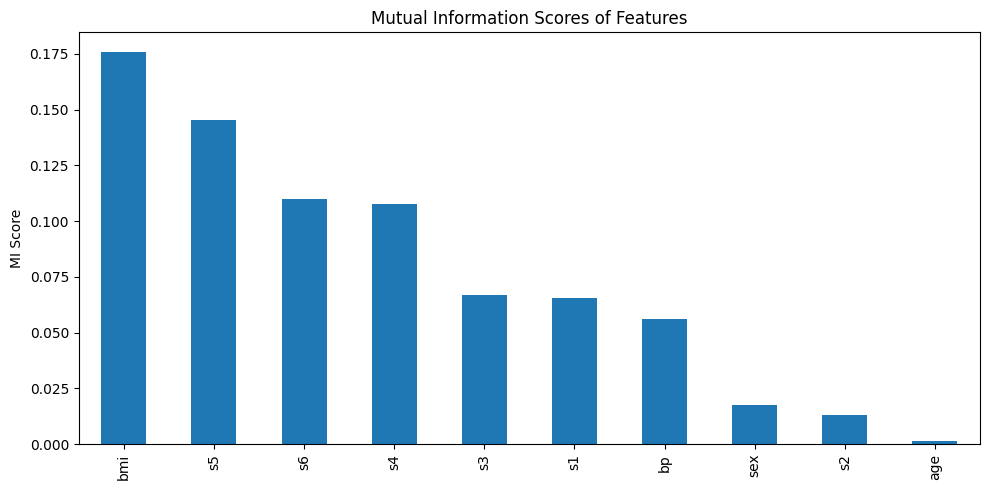

In [19]:
mi_scores = mutual_info_regression(X, y, random_state=42)

# Convert to pandas Series for readability
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Print top 5 features
print("\n🔸 Top 5 Features by Mutual Information:")
print(mi_series.head(5))

# Plot mutual information scores
plt.figure(figsize=(10, 5))
mi_series.plot(kind='bar', title="Mutual Information Scores of Features")
plt.ylabel("MI Score")
plt.tight_layout()
plt.show()